## Problem with `Bag of words` model

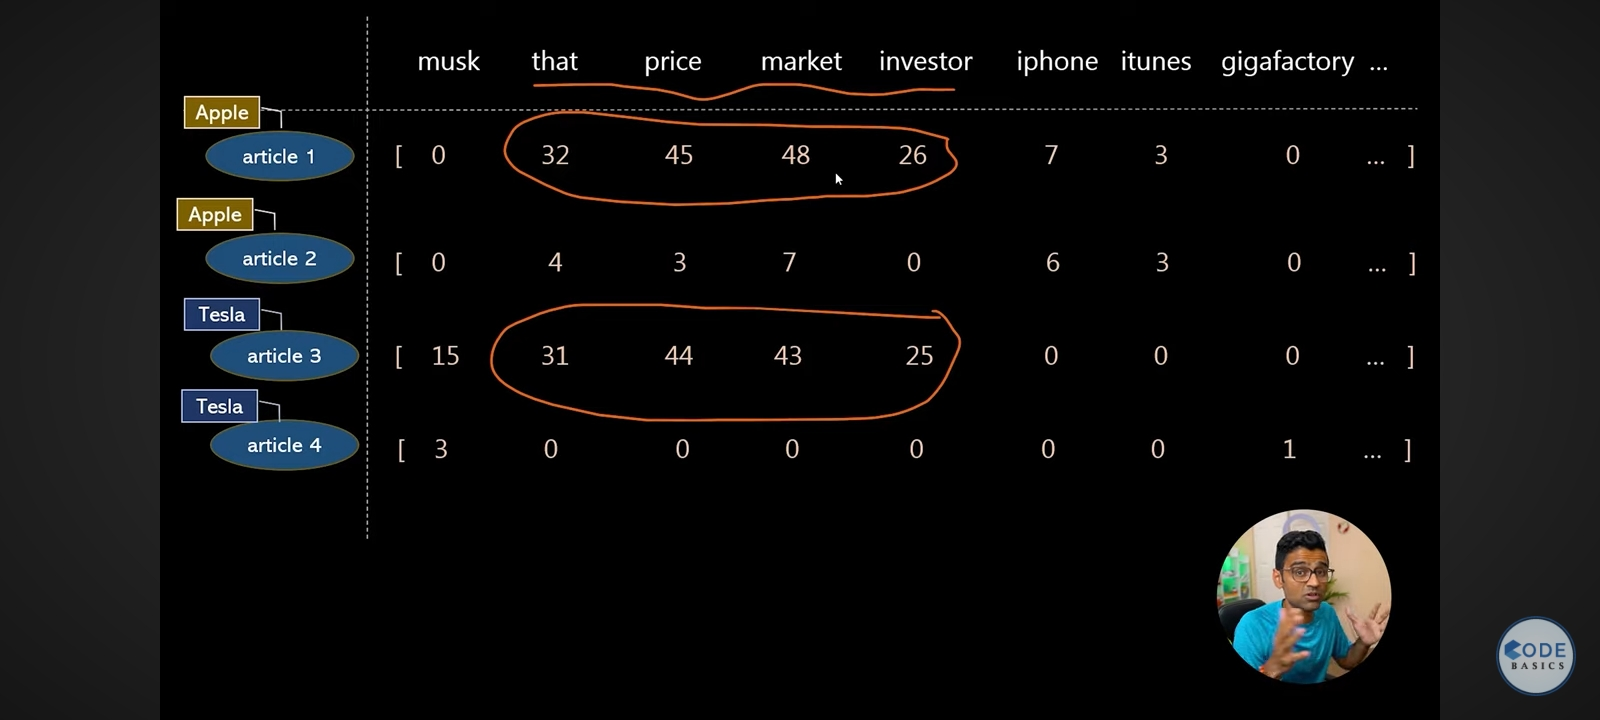

the `model` will tell that `article 1` and `article 3` are similar by looking at words `that`, `price`, `investor` etc., which is not true.

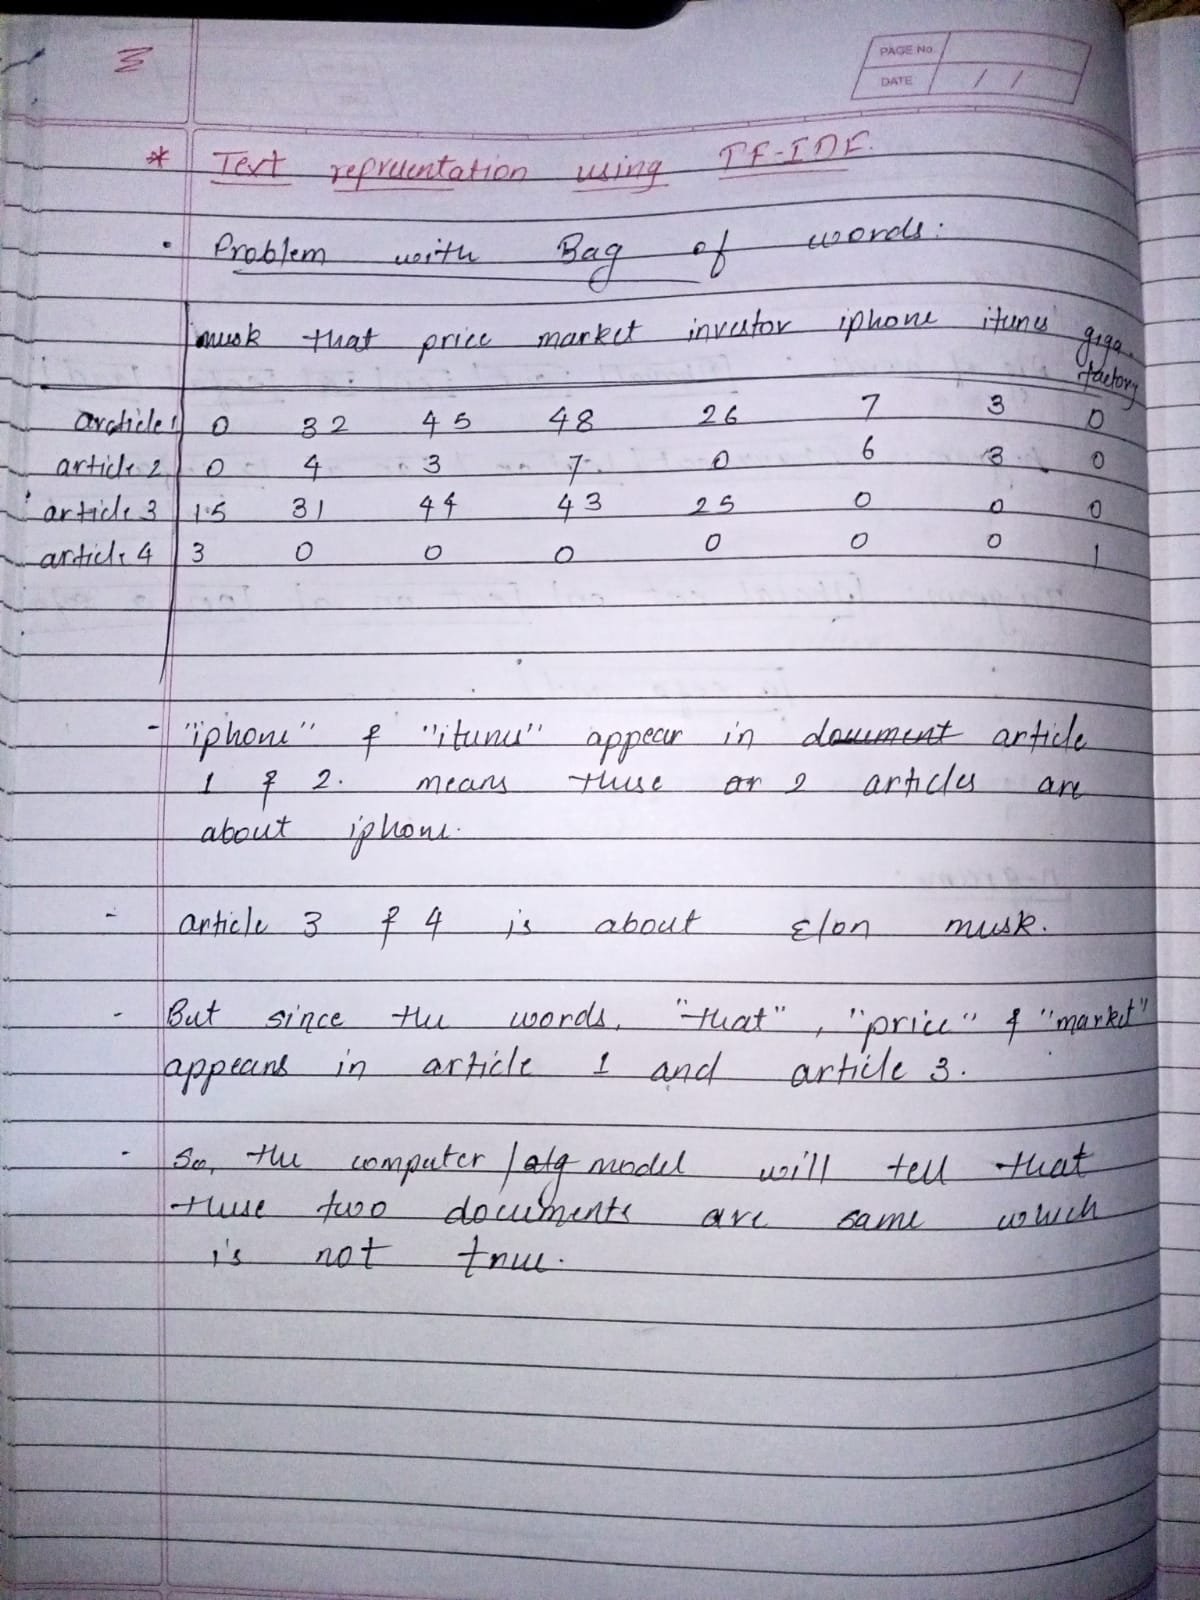

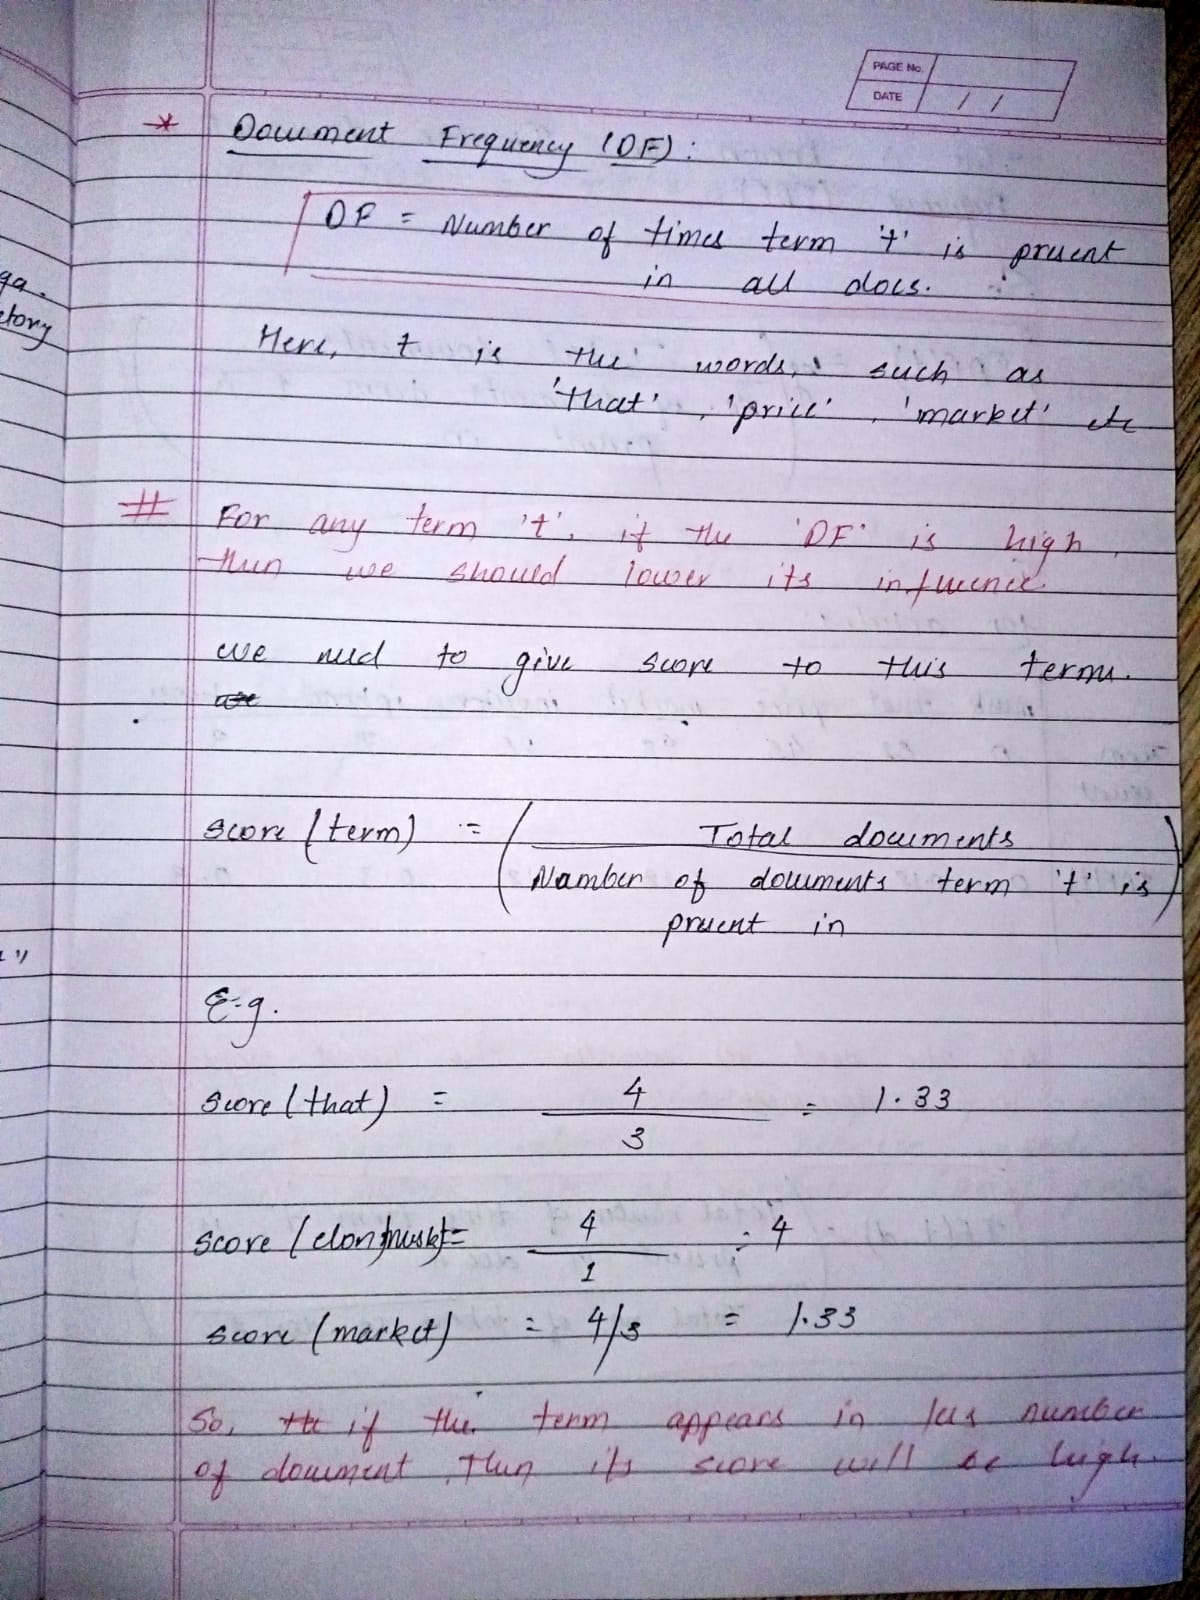

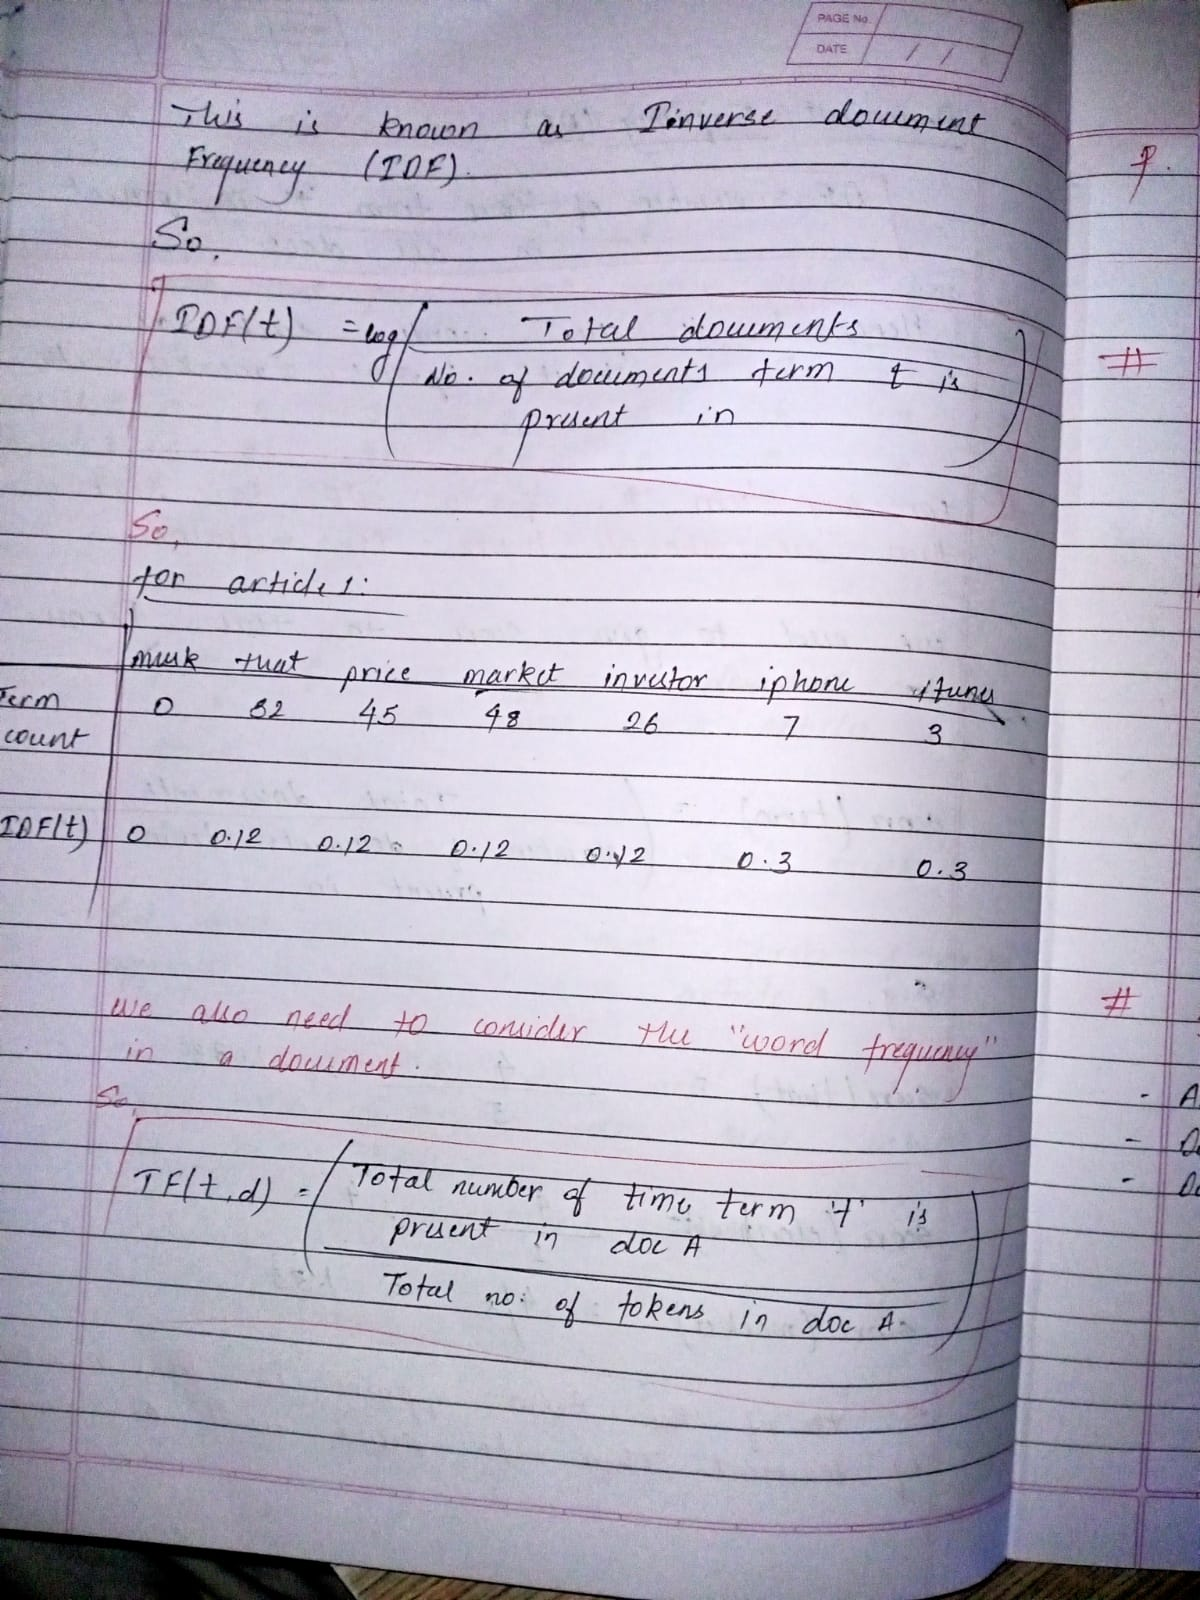

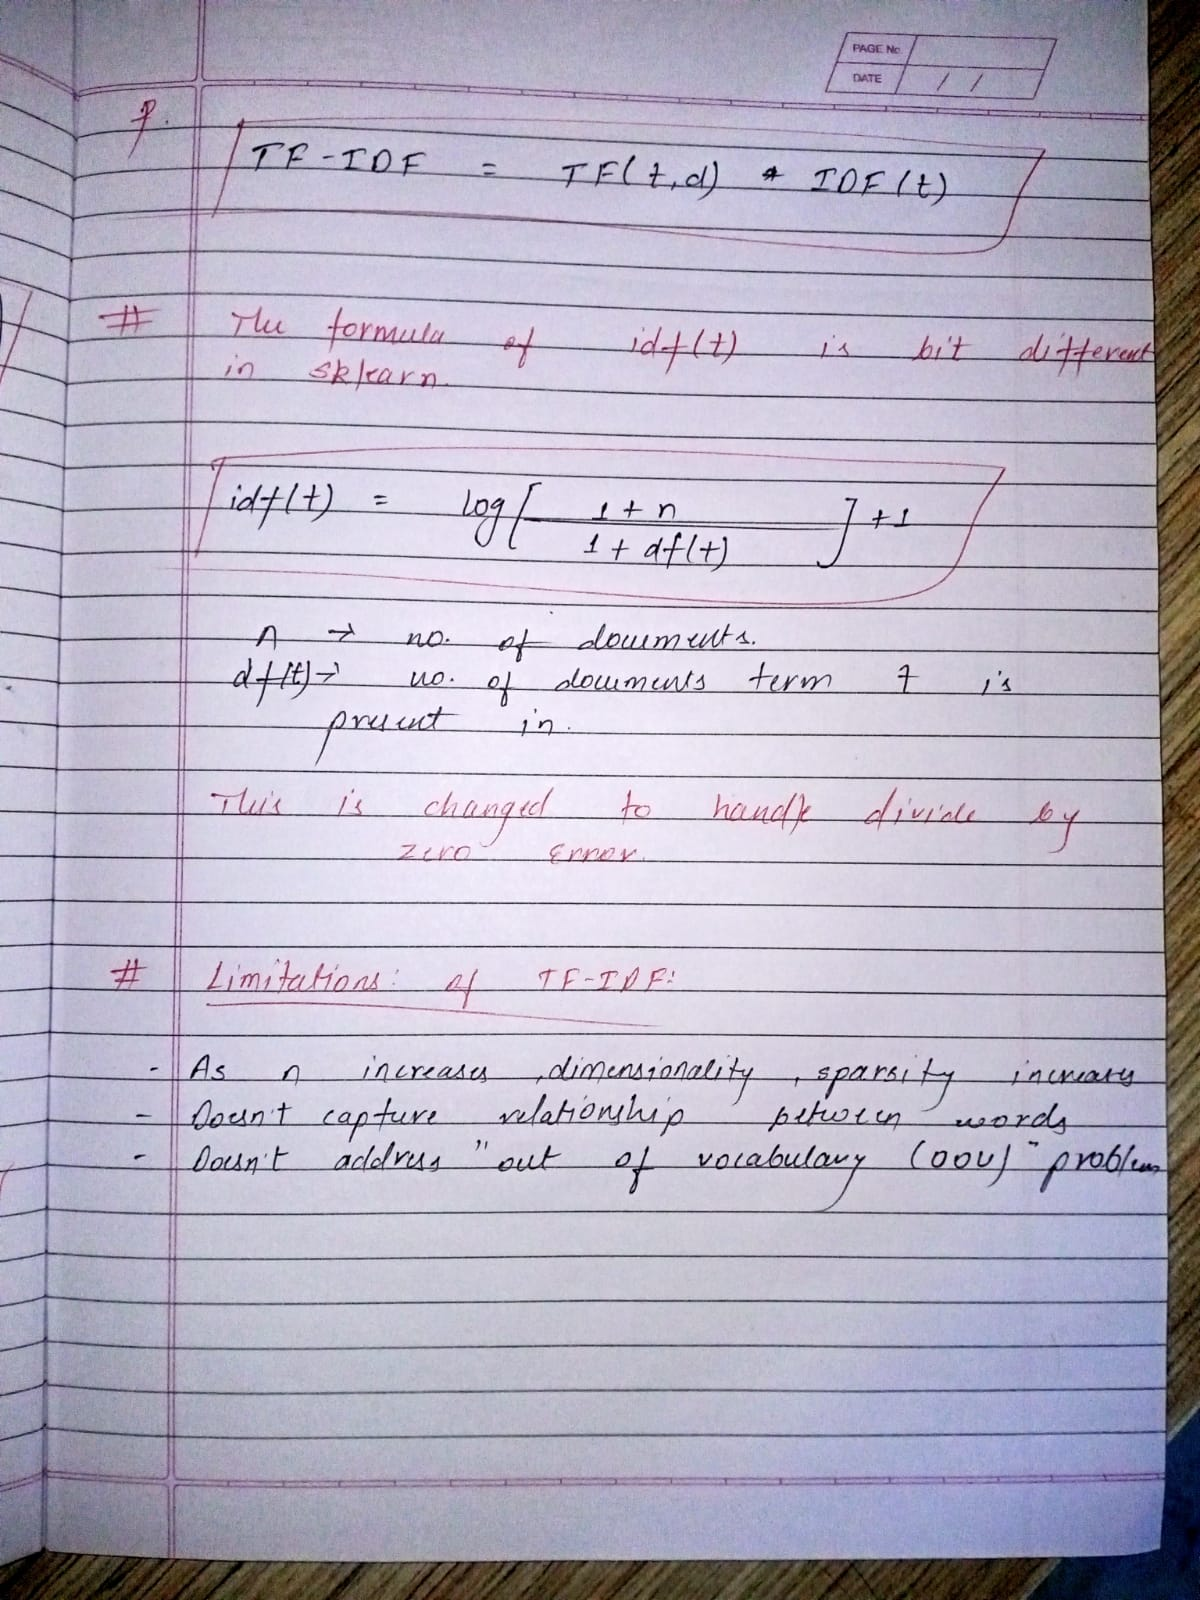

## Implementation


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [ ]:
v = TfidfVectorizer()
transformed_output = v.fit_transform(corpus) # It will create the vector

In [ ]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


Indexing is done in alphabetical order

In [ ]:
all_feature_names = v.get_feature_names_out() # this will print all the vocabulary extracted from the corpus in order

In [ ]:
all_feature_names

array(['already', 'am', 'amazon', 'and', 'announcing', 'apple', 'are',
       'ate', 'biryani', 'dot', 'eating', 'eco', 'google', 'grapes',
       'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model', 'new',
       'pixel', 'pizza', 'surface', 'tesla', 'thor', 'tomorrow', 'you'],
      dtype=object)

this vocabuaries are also known as features in TF-IDF.

In [ ]:
# printing the idf score.
for word in all_feature_names:
  indx = v.vocabulary_.get(word)
  print(f"{word} {v.idf_[indx]}")

already 2.386294361119891
am 2.386294361119891
amazon 2.386294361119891
and 2.386294361119891
announcing 1.2876820724517808
apple 2.386294361119891
are 2.386294361119891
ate 2.386294361119891
biryani 2.386294361119891
dot 2.386294361119891
eating 1.9808292530117262
eco 2.386294361119891
google 2.386294361119891
grapes 2.386294361119891
iphone 2.386294361119891
ironman 2.386294361119891
is 1.1335313926245225
loki 2.386294361119891
microsoft 2.386294361119891
model 2.386294361119891
new 1.2876820724517808
pixel 2.386294361119891
pizza 2.386294361119891
surface 2.386294361119891
tesla 2.386294361119891
thor 2.386294361119891
tomorrow 1.2876820724517808
you 2.386294361119891


In [ ]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [ ]:
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

the first indexed value is `already` whose idf score is `0.24266547`

## Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Ecommerce_data.csv')

In [ ]:
df.shape

(24000, 2)

In [ ]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [ ]:
df['label'].value_counts()

,count
label,
Household,6000
Electronics,6000
Clothing & Accessories,6000
Books,6000


In [ ]:
df['label_num'] = df['label'].map({'Household': 0, 'Electronics': 1, 'Clothing & Accessories': 2, 'Books': 3})

In [ ]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [ ]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['label_num'], test_size=0.2, random_state=2022, stratify = df.label_num)

In [ ]:
X_train.shape

(19200,)

In [ ]:
X_test.shape

(4800,)

In [ ]:
y_train.value_counts()

,count
label_num,
0,4800
2,4800
3,4800
1,4800


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
# Creating the Pipeline
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('knn', KNeighborsClassifier())])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.96      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.95      0.96      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [ ]:
X_test[:5]

,Text
20706,Lal Haveli Designer Handmade Patchwork Decorat...
19008,tirupur fashion biz Girls and Kids Solid Cotto...
14810,Modern Linguistics: An Introduction About The ...
2451,AmazonBasics Apple Certified 30-Pin to USB Cab...
6296,The Marine Corps Martial Arts Program: The Com...


In [ ]:
y_test[:5]

,label_num
20706,0
19008,2
14810,3
2451,1
6296,3


In [ ]:
y_pred[:5]

array([0, 2, 3, 1, 3])

### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Creating the Pipeline
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('knn', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1200
           1       0.96      0.96      0.96      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.93      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Pipeline
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('knn', RandomForestClassifier(n_estimators=10))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1200
           1       0.96      0.96      0.96      1200
           2       0.98      0.97      0.97      1200
           3       0.97      0.97      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



### Training the same models with preprocessed text


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
def preprocess(text):
  doc = nlp(text)
  filtered_text = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_text.append(token.lemma_)

  return " ".join(filtered_text)

In [ ]:
df['preprocessed_text'] = df['Text'].apply(preprocess)

In [ ]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label_num'], test_size=0.2, random_state=2022, stratify = df.label_num)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Pipeline
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=10))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1200
           1       0.97      0.96      0.97      1200
           2       0.98      0.97      0.98      1200
           3       0.97      0.97      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800

